In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

/var/folders/6d/m4g0vvg508z0xb6_c6h4qmfm0000gn/T/ipykernel_2955/2274562957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# downloading S&P 500 front month futures data
sp500_futures = yf.download('ES=F')

/Users/nossa/Desktop/cassiopee/code/test/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [3]:
# calculating logarithmic returns
sp500_futures['Log_Returns'] = np.log(sp500_futures['Adj Close'] / sp500_futures['Adj Close'].shift(1))

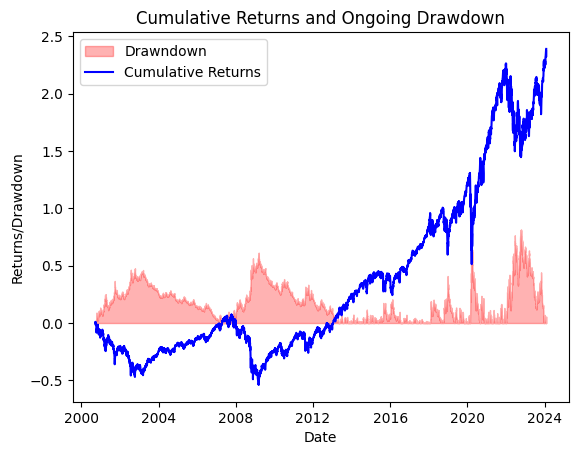

In [4]:
# calculating cumulative returns
sp500_futures['Cumulative_Returns'] = np.exp(sp500_futures['Log_Returns'].cumsum()) - 1

# calculating ongoing drawdown
rolling_max = sp500_futures['Cumulative_Returns'].cummax()
sp500_futures['Drawdown'] = rolling_max - sp500_futures['Cumulative_Returns']

# plotting the results
fig, ax = plt.subplots()
ax.fill_between(sp500_futures.index, sp500_futures['Drawdown'], label = 'Drawndown', color = 'red', alpha=0.3) 
ax.plot(sp500_futures['Cumulative_Returns'], label = 'Cumulative Returns', color = 'b')
ax.set_title('Cumulative Returns and Ongoing Drawdown')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns/Drawdown')
plt.show()

In [5]:
# working with a portfolio with 60% weight in S&P 500 futures (ES=F) and 40% weight in US 10-year Treasury futures (ZN=F)

/Users/nossa/Desktop/cassiopee/code/test/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


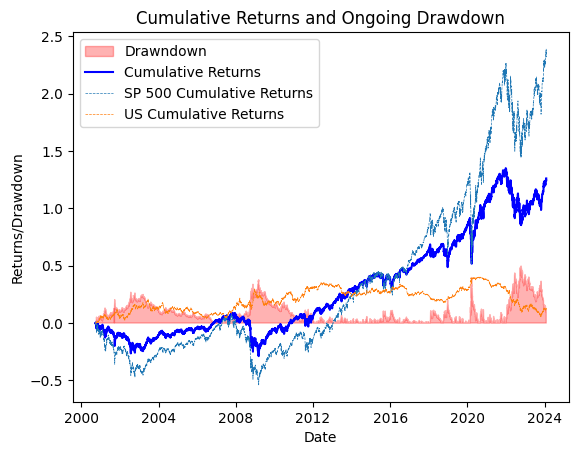

In [7]:
# downloading S&P 500 front month futures data
US_futures = yf.download('ZN=F')
US_futures['Log_Returns'] = np.log(US_futures['Adj Close'] / US_futures['Adj Close'].shift(1))
US_futures['Cumulative_Returns'] = np.exp(US_futures['Log_Returns'].cumsum()) - 1
rolling_max = US_futures['Cumulative_Returns'].cummax()
US_futures['Drawdown'] = rolling_max - US_futures['Cumulative_Returns']

# calculating logarithmic returns
futures = US_futures.copy()
futures['Log_Returns'] = np.log(sp500_futures['Adj Close'] / sp500_futures['Adj Close'].shift(1)) * 0.6 + np.log(US_futures['Adj Close'] / US_futures['Adj Close'].shift(1)) * 0.4

# calculating cumulative returns
futures['Cumulative_Returns'] = np.exp(futures['Log_Returns'].cumsum()) - 1
#futures = pd.DataFrame({'SP500': sp500_futures, 'Treasury': US_futures}).dropna()

# calculating ongoing drawdown
rolling_max = futures['Cumulative_Returns'].cummax() #cummax() ne fait pas de somme
futures['Drawdown'] = rolling_max - futures['Cumulative_Returns']

# plotting the results
fig, ax = plt.subplots()
ax.fill_between(futures.index, futures['Drawdown'], label = 'Drawndown', color = 'red', alpha=0.3) 
ax.plot(futures['Cumulative_Returns'], label = 'Cumulative Returns', color = 'b')
ax.plot(sp500_futures['Cumulative_Returns'], label = 'SP 500 Cumulative Returns', linestyle='--', linewidth=0.5)
ax.plot(US_futures['Cumulative_Returns'], label = 'US Cumulative Returns', linestyle='--', linewidth=0.5)
ax.set_title('Cumulative Returns and Ongoing Drawdown')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns/Drawdown')
plt.show()